# Assignment 4.1 - PCA

Please submit your solution of this notebook in the Whiteboard at the corresponding Assignment entry as .ipynb-file and as .pdf. <br><br>
Please do **NOT** rename the file!

#### State both names of your group members here:
[Jane and John Doe]

In [1]:
# Daniel Thompson, Paola Gega

---

## Grading Info/Details - Assignment 4.1:

The assignment will be graded semi-automatically, which means that your code will be tested against a set of predefined test cases and qualitatively assessed by a human. This will speed up the grading process for us.

* For passing the test scripts: 
    - Please make sure to **NOT** alter predefined class or function names, as this would lead to failing of the test scripts.
    - Please do **NOT** rename the files before uploading to the Whiteboard!

* **(RESULT)** tags indicate checkpoints that will be specifically assessed by a human.

* You will pass the assignment if you pass the majority of test cases and we can at least confirm effort regarding the **(RESULT)**-tagged checkpoints per task.

---

## Task 4.1.1 - PCA from Scratch

Implement Principal Component Analysis (PCA) from scratch using only `NumPy`.
This assignment will help you understand the mathematical foundations of PCA.

* Implement the PCA given the class structure below. **(RESULT)**
* Test your implementation using small synthetic datasets described in the test functions below. **(RESULT)**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class PCA:
    """
    Principal Component Analysis implementation using only NumPy.
    """
    
    def __init__(self, n_components=2):
        """
        Initialize PCA.
        """
        self.n_components = n_components
        self.explained_variance_ = None
        self.mean_ = None
        self.transformation_ = None
        self.dim_ = None
        
    def fit(self, X):
        """
        Fit PCA on the training data X.
        """
        self.dim_ = X.shape[1]

        # First we center the features of X
        self.mean_ = X.mean(axis=0)
        X = X-self.mean_

        cov = np.cov(X.T)
        S, W = np.linalg.eig(cov)
        sorted_indices = np.argsort(S)[::-1]
        self.explained_variance_ = S[sorted_indices]
        W_sorted = W[:,sorted_indices]
        self.transformation_ = W_sorted[:, :self.n_components]
    
    def transform(self, X, dim=5):
        """
        Transform X into the principal component space.
        """
        if X.shape[1] != self.dim_:
            raise Exception("Input data does not match fitted dimension!")
        projected_data = np.dot((X-self.mean_), self.transformation_)
        return projected_data
    
    def inverse_transform(self, X):
        """
        Transform data back to original space.
        """
        if X.shape[1] != self.n_components:
            raise Exception("Input data does not match fitted dimension!")
        reconstructed_data = np.dot(X, self.transformation_.T) + self.mean_
        return reconstructed_data
    
    def fit_transform(self, X):
        """
        Fit PCA and transform X in one step.
        """
        self.fit(X)
        return self.transform(X)

In [4]:
def test_basic_pca():
    """Test 1: Basic PCA on 2D data"""
    print("Test 1: Plot then verify PCA on 2D data can be losslessly reversed")
    
    np.random.seed(42)
    X = np.random.multivariate_normal((2.6,7.8), [[244, 238], [238, 239]], 100)

    plot_1 = plt.subplot(1, 2, 1)
    plt.subplots_adjust(bottom=0.1, right=1.6, top=0.9)
    plt.scatter(X[:, 0], X[:, 1])
    plt.scatter(2.6, 7.8, c='red', s=200, marker='X', label='Mean')
    plt.title("Multivariate Gaussian samples")
    plt.legend()

    pca = PCA(n_components=2)
    Y = pca.fit_transform(X)

    plot_2 = plt.subplot(1, 2, 2)
    plt.scatter(Y[:, 0], Y[:, 1])
    plt.title("PCA-transformed data")
    plt.show()

    X_reconstructed = pca.inverse_transform(Y)
    # Reconstructed data should be close to the original data
    print(f"Frobenius norm of the difference: {np.linalg.norm(X-X_reconstructed):.10f}")
    print("✓ Test 1 passed\n")


def test_dimensionality_reduction():
    """Test 2: Reduce 5D data to 2D"""
    print("Test 2: Plot a PCA projection of 5D data to 2D")
    
    np.random.seed(42)
    X = np.random.multivariate_normal(np.random.randint(-10, 10, 5),
                                      np.eye(5)* np.array([10,4,2,2,1]), 100)
    pca = PCA(n_components=2)
    Y = pca.fit_transform(X)
    # Plot the projection
    plt.scatter(Y[:, 0], Y[:, 1])
    plt.title("PCA projection")
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()
    # print(f"Frobenius norm of the difference: {np.linalg.norm(X-X_reconstructed):.10f}")
    print("✓ Test 2 passed\n")

def test_reconstruction():
    """Test 3: Inverse transform (reconstruction)"""
    print("Test 3: Perform the inverse transform back to 5D")
    
    np.random.seed(42)
    X = np.random.multivariate_normal(np.random.randint(-10, 10, 5),
                                      np.random.randint(1, 10, 5) * np.eye(5), 100)
    pca = PCA(n_components=2)
    Y = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(Y)
    # print(f"Frobenius norm of the difference: {np.linalg.norm(X-X_reconstructed):.10f}")
    print("✓ Test 3 passed\n")

def test_variance_ordering():
    """Test 4: Components are ordered by variance"""
    print("Test 4: Verify components are ordered by explained variance")
    
    np.random.seed(42)
    X = np.random.randn(100, 5)
    
    pca = PCA(n_components=5)
    pca.fit(X)
    
    # Check that explained variances are in descending order
    variances = pca.explained_variance_
    is_sorted = np.all(variances[:-1] >= variances[1:])
    
    print(f"Explained variances: {variances}")
    print(f"Is sorted (descending): {is_sorted}")
    assert is_sorted, "Components not sorted by variance!"
    print("✓ Test 4 passed\n")


def test_centered_data():
    """Test 5: Verify data is properly centered"""
    print("Test 5: Verify data centering")
    
    np.random.seed(42)
    X = np.random.randn(100, 3) + 10  # Add offset
    
    pca = PCA(n_components=2)
    pca.fit(X)
    
    # Mean should be close to the original data mean
    print(f"Original data mean: {np.mean(X, axis=0)}")
    print(f"Stored mean: {pca.mean_}")
    print(f"Difference: {np.mean(np.abs(np.mean(X, axis=0) - pca.mean_)):.10f}")
    print("✓ Test 5 passed\n")


def run_all_tests():
    print("Running PCA test suite...\n")
    try:
        test_basic_pca()
        test_dimensionality_reduction()
        test_reconstruction()
        test_variance_ordering()
        test_centered_data()
        
        print("ALL TESTS PASSED!")
        
    except AssertionError as e:
        print(f"\n❌ Test failed: {e}")
    except Exception as e:
        print(f"\n❌ Unexpected error: {e}")

Running PCA test suite...

Test 1: Plot then verify PCA on 2D data can be losslessly reversed


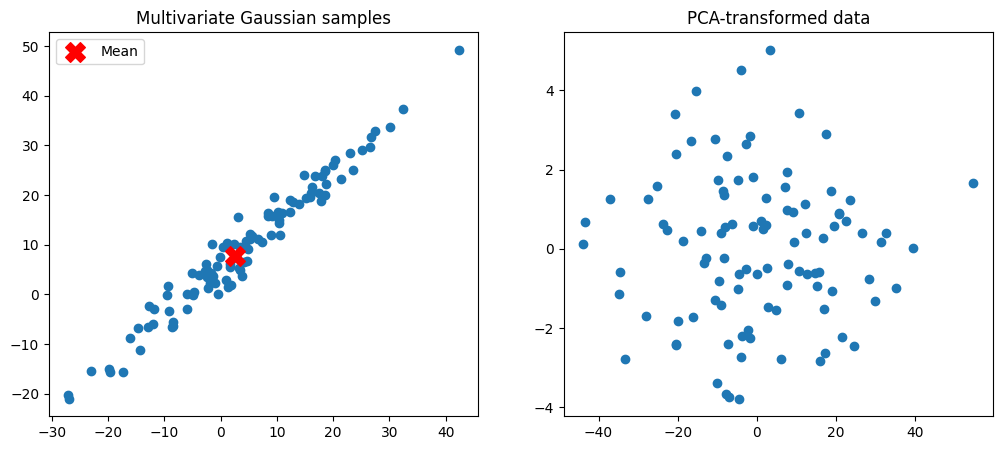

Frobenius norm of the difference: 0.0000000000
✓ Test 1 passed

Test 2: Plot a PCA projection of 5D data to 2D


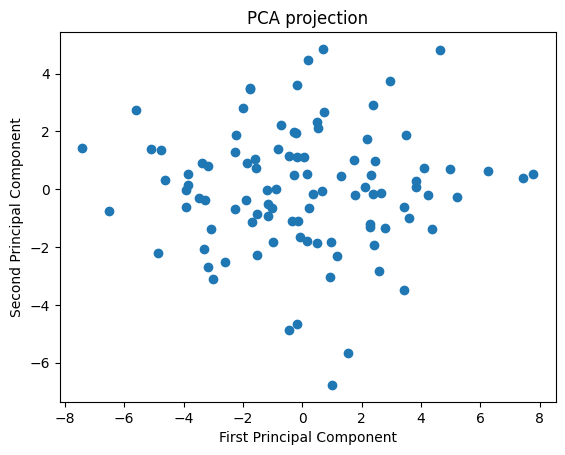

✓ Test 2 passed

Test 3: Perform the inverse transform back to 5D
✓ Test 3 passed

Test 4: Verify components are ordered by explained variance
Explained variances: [1.26528496 1.03990633 0.97435577 0.87353896 0.66582554]
Is sorted (descending): True
✓ Test 4 passed

Test 5: Verify data centering
Original data mean: [10.09176598  9.81676669 10.07482166]
Stored mean: [10.09176598  9.81676669 10.07482166]
Difference: 0.0000000000
✓ Test 5 passed

ALL TESTS PASSED!


In [5]:
# Run the test suite
run_all_tests()

## Task 4.1.2 - PCA on Real-World Data

* Apply your PCA implementation on the `California Housing Dataset`. **(RESULT)**
* Compare your results with those obtained from the scikit-learn PCA implementation: `sklearn.decomposition.PCA`. Are your results within numerical precision? **(RESULT)**


In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.decomposition import PCA as SklearnPCA

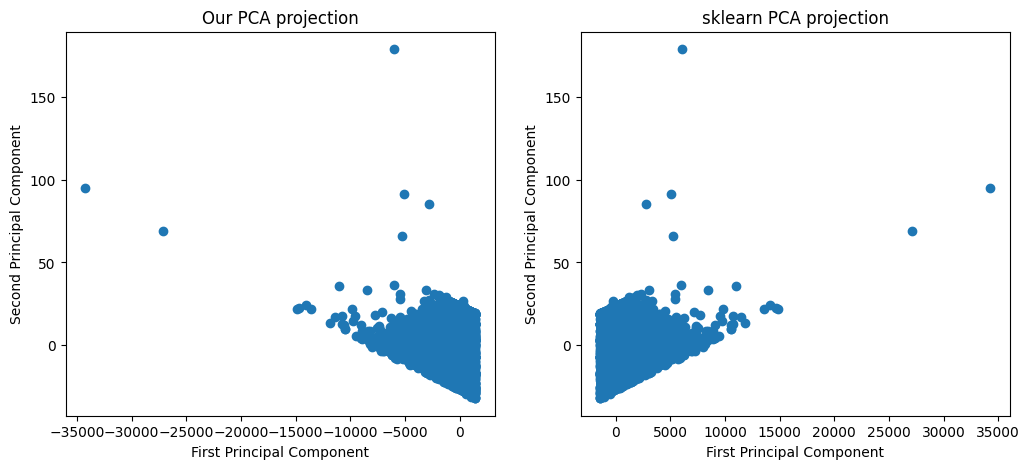

Frobenius norm of the difference: 0.0000000015


In [7]:
data = fetch_california_housing()
X= data.data

my_pca = PCA(n_components=2)
my_Y = my_pca.fit_transform(X)

# We center the features of X as not sure whether this is done in the sklearn implementation
means = X.mean(axis=0)
X_centered = (X-means)
pca = SklearnPCA(n_components=2)
Skl_Y = pca.fit_transform(X_centered)

plot_1 = plt.subplot(1, 2, 1)
plt.subplots_adjust(bottom=0.1, right=1.6, top=0.9)
plt.scatter(my_Y[:, 0], my_Y[:, 1])
plt.title("Our PCA projection")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plot_2 = plt.subplot(1, 2, 2)
plt.scatter(Skl_Y[:, 0], Skl_Y[:, 1])
plt.title("sklearn PCA projection")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

my_Y[:,0] *= -1

print(f"Frobenius norm of the difference: {np.linalg.norm(my_Y-Skl_Y):.10f}")
# print(f"Average difference between 2D-projected data points: {np.linalg.norm(my_Y-Skl_Y)/len(X):.10f}")

Note that there are two ways to choose a unit vector in a one-dimensional real eigenspace, so each PCA feature dimension is only well determined upto a sign.  Therefore our PCA is essentially the same as the PCA implemented by sklearn.  In our calculation of the Frobenius norm of the difference between our transformed data and the sklearn version, we already perform the sign correction on the first dimension. 

## Congratz, you made it! :)